In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import random

D:\IDES\anaconda\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
D:\IDES\anaconda\lib\site-packages\networkx\drawing\nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


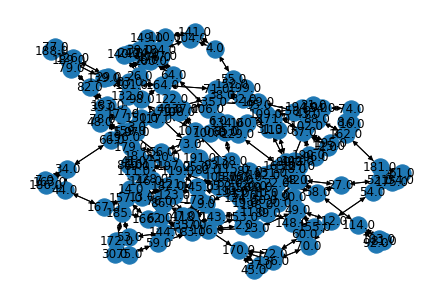

In [2]:
graph_data=np.loadtxt('graph_200.txt')
graph=nx.DiGraph()
graph.add_edges_from(graph_data)

for e in graph.edges():
    if 'prob' not in graph[e[0]][e[1]]:
      graph[e[0]][e[1]]['prob'] = 1.0
#print(graph.edges(data=True))

nx.draw(graph, with_labels=True)

plt.show()
    

In [3]:
def influence_diffusion(G,n):
    '''
    G:graph struture
    n: the activated node
    
    This function only calculates the influence spread in *ONE* time
    return:
    activated_node: set
    '''
    #for n_child in G.successors(n):
    #    t_seed=random.random()
    #    if t_seed<G[n][n_child]['prob']:
    #        activated_nodes.add(n_child)
    #        influence_diffusion(G,n_child) # recursively influence the children
    #    else:
    #        continue
    # recursion Error
    activated_nodes=[]
    activated_nodes.append(n)
    for node in activated_nodes:
        children=G.successors(node)
        for child_node in children:
            t_seed=random.random()
            if t_seed<G[node][child_node]['prob']:
                if child_node not in activated_nodes:
                    activated_nodes.append(child_node)
    return set(activated_nodes)


In [5]:

'''
G: the graph structure
return: Seed nodes
Seed_size: the number of Seed nodes
R: sampling rounds
    
influence_num(S+n)-influence_num(S)------ marginal influence gain
    
In practice, the larger the R, the higher the accurcacy of the evaluation
However, in this datasets, the edge_weights are considered. So in fact, there is no
need to sample R times.
I doing this is just for scalability
'''
Seed_size=5
R=20
Seeds=[]
activated_nodes=set()

max_gain=-1
max_activation=set()
activation_copy=set()

for i in range(Seed_size):
    for node in graph.nodes():
        if node not in Seeds:
            activation_copy=activated_nodes.copy()
            for j in range(R):
                influence_result=influence_diffusion(graph,node)
                activation_copy=activation_copy.union(influence_result)
            marginal_gain=len(activation_copy)-len(activated_nodes)
            if marginal_gain>max_gain:
                marginal_gain=max_gain
                max_influence_node=node.copy()
                max_activation=activation_copy.copy()
        else:
            continue
    activated_nodes=activated_nodes.union(max_activation)
    Seeds.append(max_influence_node)

print(Seeds)
        
    

[121.0, 166.0, 197.0, 131.0, 123.0]
